In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
train_data=pd.read_csv('train.csv')
display(train_data)
train_data.info()

,user_id,item_id,cate_id,action_type
0,11482147,492681,1_11,view
1,12070750,457406,1_14,deep_view
2,12431632,527476,1_1,view
3,13397746,531771,1_6,deep_view
4,13794253,510089,1_27,deep_view
...,...,...,...,...
1048570,1029999,541372,1_1,view
1048571,10409852,534217,3_6,view
1048572,10428272,541609,1_1,deep_view
1048573,13287449,510651,1_11,deep_view


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1048575 non-null  object
 1   item_id      1048575 non-null  int64 
 2   cate_id      1048575 non-null  object
 3   action_type  1048575 non-null  object
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


In [2]:
item_grouped=train_data.groupby(['item_id'])
item_num = {}
for i in item_grouped:
    item_num[i[0]]=len(i[1])

item_num=dict(sorted(item_num.items(),key = lambda x:x[1],reverse=True))
print(item_num)

{536585: 6637, 536769: 5941, 536551: 4928, 536443: 4625, 536364: 4309, 536768: 4279, 535553: 4256, 536557: 4055, 536432: 3550, 536650: 3319, 536731: 3136, 526888: 3115, 536167: 3114, 525212: 3067, 520522: 2985, 535598: 2843, 536553: 2785, 527351: 2507, 527465: 2445, 536422: 2295, 536730: 2241, 539444: 2131, 536729: 2059, 527430: 1977, 536580: 1898, 538039: 1896, 536784: 1858, 534162: 1783, 527488: 1711, 526077: 1683, 537058: 1658, 535350: 1639, 535939: 1632, 536310: 1594, 527476: 1571, 536180: 1542, 527026: 1534, 534978: 1441, 524540: 1429, 537049: 1428, 535594: 1408, 536460: 1371, 536446: 1341, 536555: 1340, 437629: 1328, 522138: 1320, 526809: 1309, 536569: 1307, 523306: 1267, 536808: 1238, 536115: 1229, 425399: 1226, 524690: 1216, 536466: 1212, 526261: 1204, 533294: 1201, 536706: 1178, 537053: 1170, 537665: 1151, 527443: 1150, 527193: 1143, 527252: 1140, 525403: 1117, 527131: 1117, 527493: 1107, 537054: 1105, 527519: 1076, 526484: 1057, 536772: 1025, 526113: 1010, 525297: 982, 525318

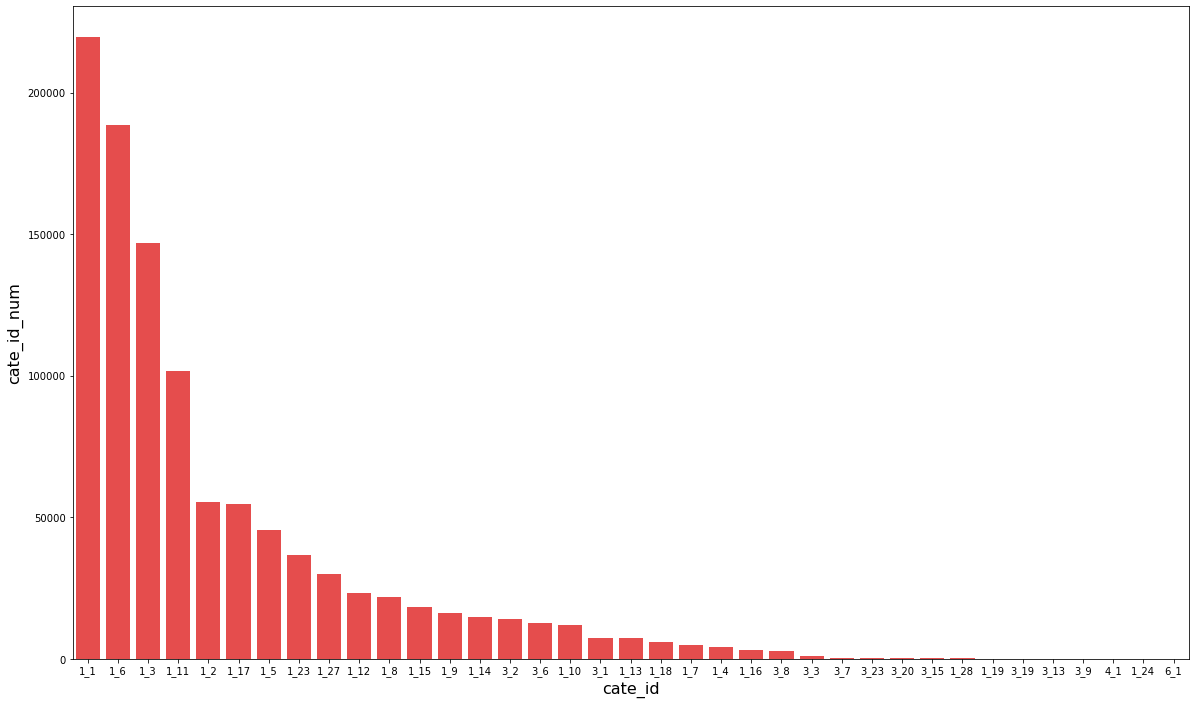

In [3]:
cate_grouped=train_data.groupby(['cate_id'])
cate_num = {}
for i in cate_grouped:
    cate_num[i[0]]=len(i[1])

cate_num=dict(sorted(cate_num.items(),key = lambda x:x[1],reverse=True))
plt.subplots(figsize=(20,12))
sns.barplot(x=list(cate_num.keys()), y=list(cate_num.values()),alpha=0.8, color='red')
plt.ylabel('cate_id_num', fontsize=16)
plt.xlabel('cate_id', fontsize=16)
plt.savefig('cate_id_num',dpi=400)
plt.show()

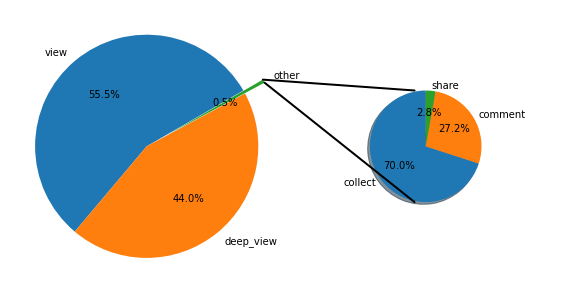

In [4]:
#每一类行为的数量
action_grouped = train_data.groupby(train_data['action_type'])
action_type_num={}
total_num=0
for i in action_grouped:
    action_type_num[i[0]]=len(i[1])
    total_num+=len(i[1])
action_type_num=dict(sorted(action_type_num.items(),key = lambda x:x[1],reverse=True))
other=0
other_dict={}
for i in list(action_type_num.items()):
    if i[1]/total_num<0.15:
        other+=i[1]
        other_dict[i[0]]=i[1]
        action_type_num.pop(i[0])
action_type_num['other']=other
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(121)   #大饼图
ax2=fig.add_subplot(122)    #小饼图
fig.subplots_adjust(wspace=0)
ax1.pie(action_type_num.values(),labels=action_type_num.keys(),autopct='%1.1f%%',startangle=30,explode=(0,0,0.2))
ax2.pie(other_dict.values(),labels=other_dict.keys(),autopct='%1.1f%%',startangle=90,radius=0.5,shadow=True)

theta1,theta2=ax1.patches[2].theta1,ax1.patches[2].theta2
center,r=ax1.patches[2].center,ax1.patches[2].r

#画出边缘上的连线
x=r*np.cos(theta2*np.pi/180)+center[0]
y=np.sin(theta2*np.pi/180)+center[1]
connect = ConnectionPatch(xyA=(-0.1,0.5),xyB=(x,y),coordsA='data', coordsB='data',axesA=ax2,axesB=ax1)
connect.set_linewidth(2)
connect.set_color([0,0,0])
ax2.add_artist(connect)
x = r*np.cos(theta1*np.pi/180)+center[0]
y = np.sin(theta1*np.pi/180)+center[1]
connect = ConnectionPatch(xyA=(-0.1,-0.5),xyB=(x,y),coordsA='data', coordsB='data',axesA=ax2,axesB=ax1)
connect.set_linewidth(2)
connect.set_color=([0,0,0])
ax2.add_artist(connect)
plt.savefig('action_type',dpi=400)
plt.show()


In [5]:
#plt.pie(action_type_num.values()) #画饼图（数据，数据对应的标签，百分数保留两位小数点）
# sns.barplot(y=list(action_type_num.keys()), x=list(action_type_num.values()),orient='h', alpha=0.8, color='red')
# plt.ylabel('action_type', fontsize=16)
# plt.xlabel('action_type_num', fontsize=16)
# plt.xticks(rotation='horizontal')
# plt.yticks(fontsize=15)
# plt.show()

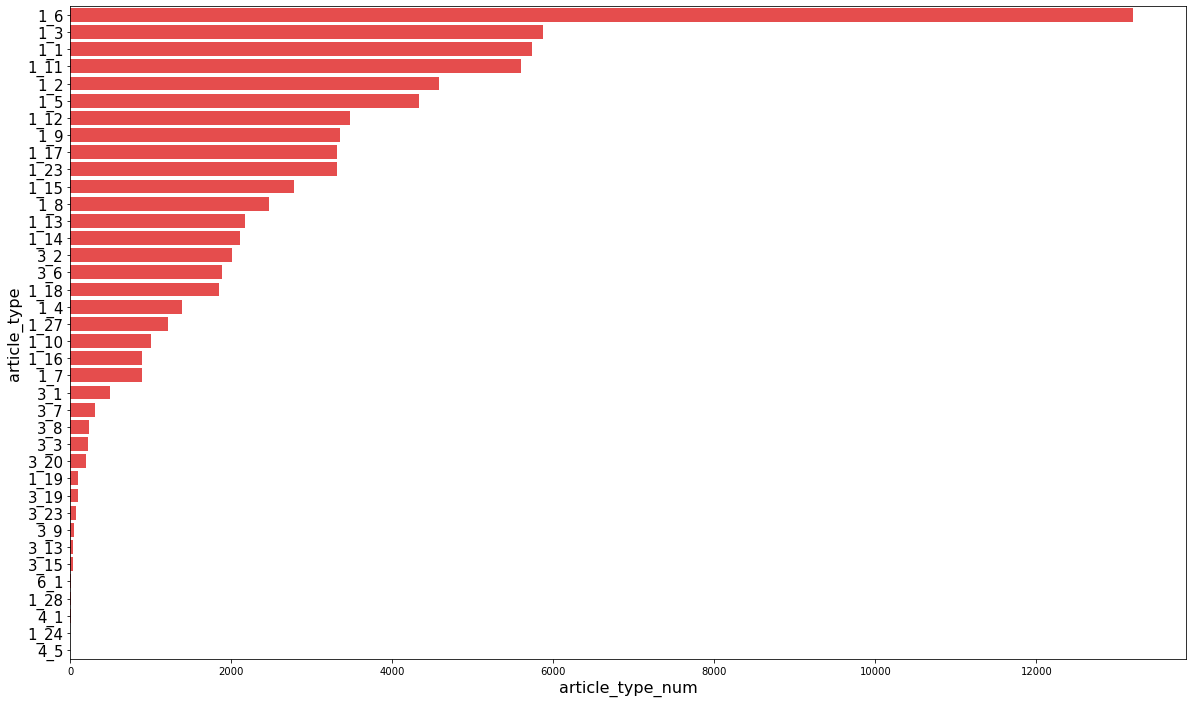

{'1_6': 13202, '1_3': 5876, '1_1': 5730, '1_11': 5591, '1_2': 4580, '1_5': 4333, '1_12': 3469, '1_9': 3349, '1_17': 3316, '1_23': 3312, '1_15': 2776, '1_8': 2467, '1_13': 2170, '1_14': 2101, '3_2': 2002, '3_6': 1879, '1_18': 1847, '1_4': 1390, '1_27': 1208, '1_10': 1001, '1_16': 891, '1_7': 891, '3_1': 495, '3_7': 309, '3_8': 225, '3_3': 219, '3_20': 191, '1_19': 95, '3_19': 95, '3_23': 74, '3_9': 50, '3_13': 31, '3_15': 30, '6_1': 9, '1_28': 5, '4_1': 2, '1_24': 1, '4_5': 1}


In [6]:
#每一类的文章的数量
all_news=pd.read_csv('all_news_info.csv')
article_grouped = all_news.groupby(all_news['cate_id'])
article_type_num = {}
for i in article_grouped:
    article_type_num[i[0]]=len(i[1])

article_type_num=dict(sorted(article_type_num.items(),key = lambda x:x[1],reverse=True))
plt.subplots(figsize=(20,12))
sns.barplot(y=list(article_type_num.keys()), x=list(article_type_num.values()),orient='h', alpha=0.8, color='red')
plt.ylabel('article_type', fontsize=16)
plt.xlabel('article_type_num', fontsize=16)
plt.xticks(rotation='horizontal')
plt.yticks(fontsize=15)
plt.savefig('article_cate',dpi=400)
plt.show()
print(article_type_num)

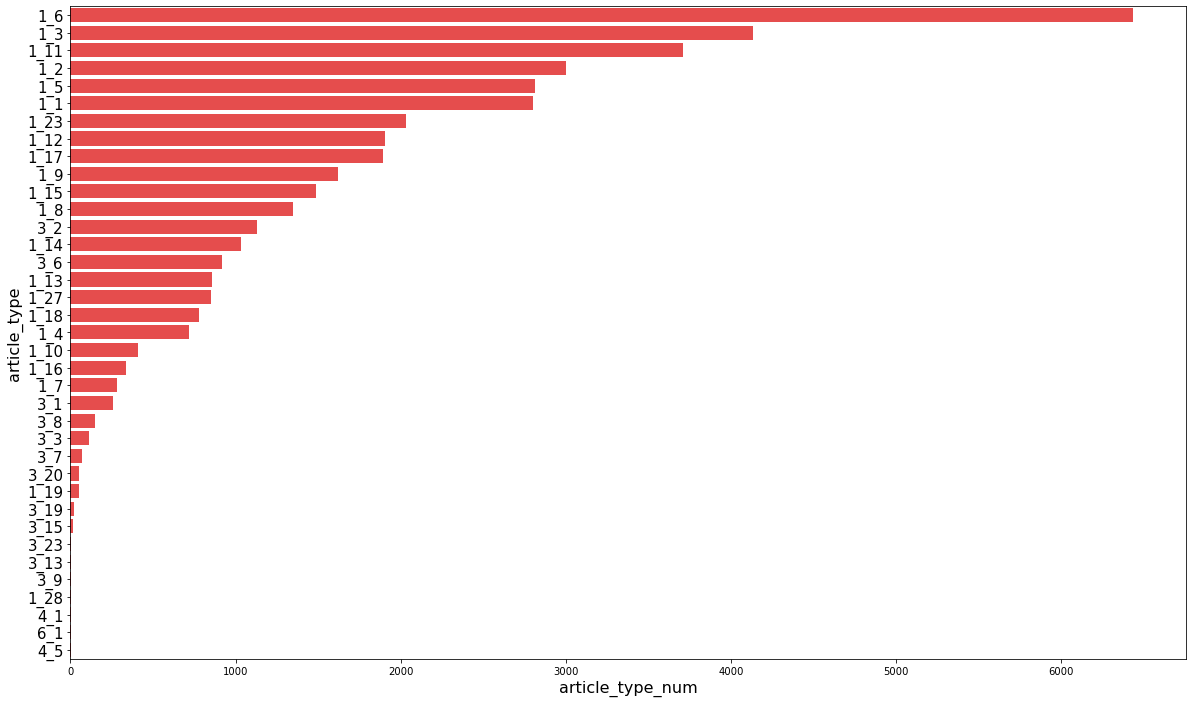

{'1_6': 6437, '1_3': 4137, '1_11': 3709, '1_2': 3004, '1_5': 2811, '1_1': 2801, '1_23': 2030, '1_12': 1908, '1_17': 1895, '1_9': 1618, '1_15': 1490, '1_8': 1350, '3_2': 1132, '1_14': 1035, '3_6': 918, '1_13': 855, '1_27': 853, '1_18': 776, '1_4': 716, '1_10': 408, '1_16': 339, '1_7': 281, '3_1': 261, '3_8': 146, '3_3': 112, '3_7': 72, '3_20': 55, '1_19': 51, '3_19': 21, '3_15': 13, '3_23': 5, '3_13': 3, '3_9': 3, '1_28': 2, '4_1': 2, '6_1': 2, '4_5': 1}


In [7]:
#待推送文章的数量
news=pd.read_csv('news_info.csv')
new_article_grouped = news.groupby(news['cate_id'])
new_article_type_num = {}
for i in new_article_grouped:
    new_article_type_num[i[0]]=len(i[1])
new_article_type_num=dict(sorted(new_article_type_num.items(),key = lambda x:x[1],reverse=True))
plt.subplots(figsize=(20,12))
sns.barplot(y=list(new_article_type_num.keys()), x=list(new_article_type_num.values()),orient='h', alpha=0.8, color='red')
plt.ylabel('article_type', fontsize=16)
plt.xlabel('article_type_num', fontsize=16)
plt.xticks(rotation='horizontal')
plt.yticks(fontsize=15)
plt.savefig('pre_article_cate',dpi=400)
plt.show()
print(new_article_type_num)